In [1]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path
import graspologic as gl
from celegans_connectome_analysis.get_nx import get_adult_c_elegans_nx, get_fxnl_nx
import numpy as np

In [2]:
G = get_fxnl_nx()

<Axes: title={'center': 'Structural Connectome'}>

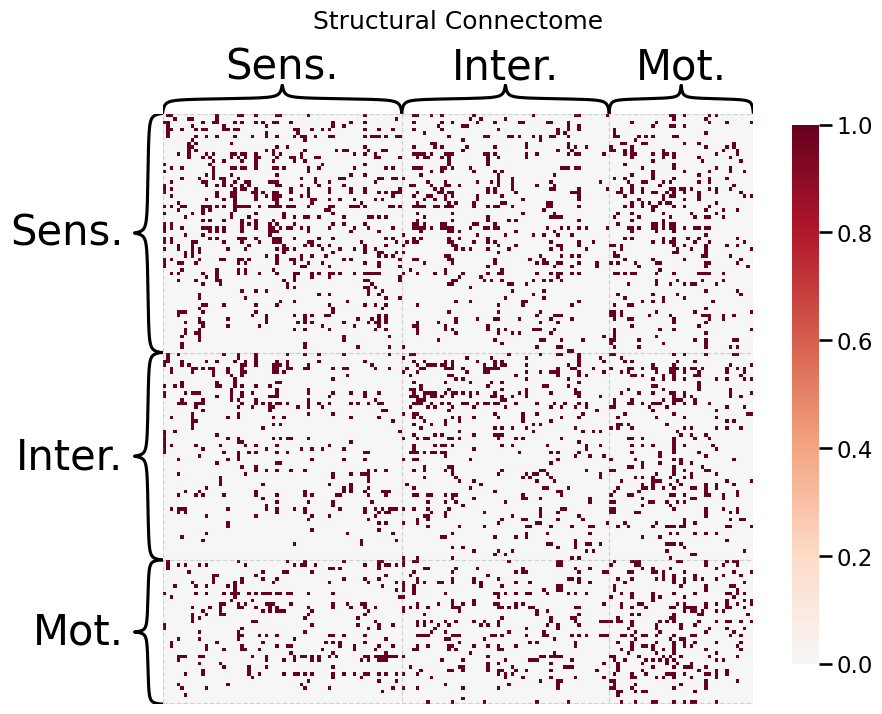

In [3]:
# get adjacency matrix
muscle_nodes = [n for n in G.nodes if G.nodes[n]["neuron type"] == "Muscle"]

G.remove_nodes_from(muscle_nodes)
category_order = {'Sens.': 0, 'Inter.': 1, 'Mot.': 2, 'Mod.': 3, 'Other': 4}

ordered_nodes = sorted(G.nodes(), key=lambda n: category_order[G.nodes[n]["neuron type"]])
A = nx.adjacency_matrix(G, nodelist=ordered_nodes, weight='weight').todense()
neuron_types = [G.nodes[n]["neuron type"] for n in ordered_nodes]

A_np = np.asarray(A)
binarized_A = (A_np > 0).astype(int)
gl.plot.heatmap(binarized_A, inner_hier_labels=neuron_types, sort_nodes=False, title="Structural Connectome", cbar=True)


In [4]:
# get row vectors for all neurons

row_vecs = {}

for ix, n in enumerate(ordered_nodes):
    row_vecs[n] = binarized_A[ix, :]

In [5]:
# helper funcs

def hamming_distance(v1, v2):
    return np.sum(v1 != v2)

In [6]:
hamming_matrix = np.zeros((len(ordered_nodes), len(ordered_nodes)))
for v1 in range(len(ordered_nodes)):
    for v2 in range(len(ordered_nodes)):
        hamming_matrix[v1, v2] = hamming_distance(row_vecs[ordered_nodes[v1]], row_vecs[ordered_nodes[v2]])

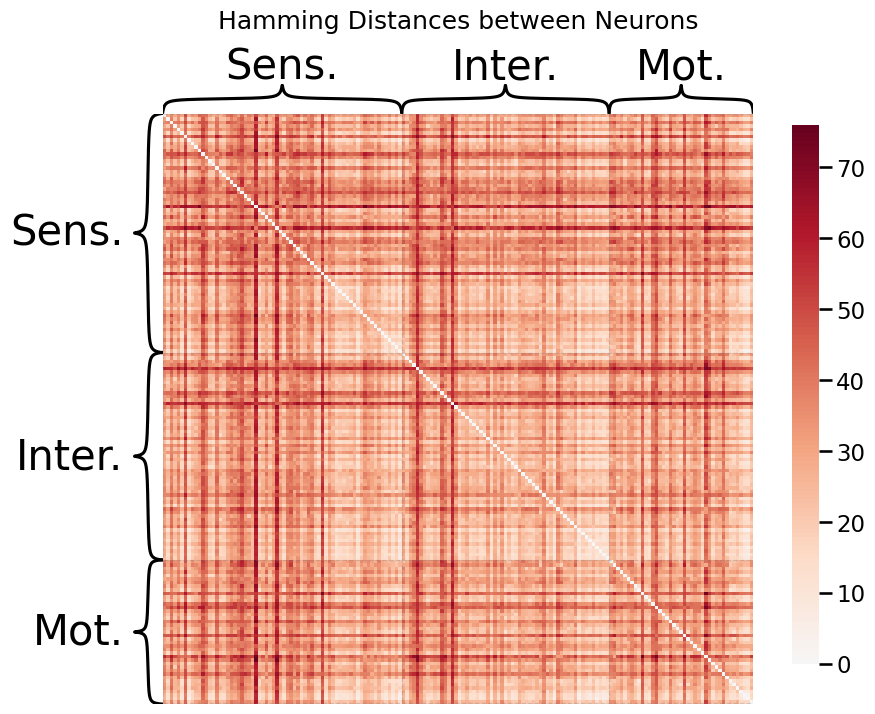

In [7]:
# plot hamming_matrix

title = "Hamming Distances between Neurons"
gl.plot.heatmap(hamming_matrix, inner_hier_labels=neuron_types, sort_nodes=False, title=title, cbar=True)
plt.show()

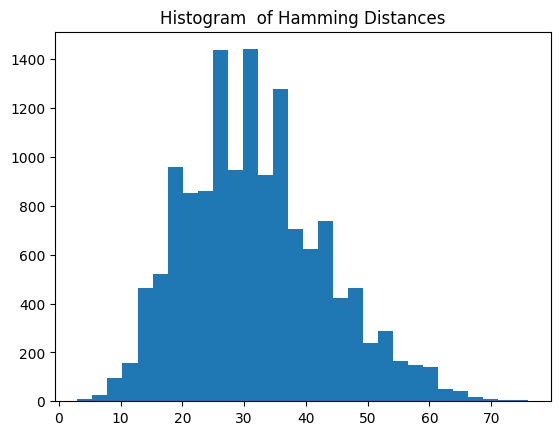

In [8]:
# make histogram of upper-triangular values (excluding the diagonal)
upper_tri_vals = hamming_matrix[np.triu_indices(hamming_matrix.shape[0], k=1)]
plt.hist(upper_tri_vals, bins=30)
plt.title("Histogram  of Hamming Distances")
plt.show()

In [9]:
upper_tri_ix = np.triu_indices(hamming_matrix.shape[0], k=1)
for ix1, ix2 in zip(*upper_tri_ix):
    if ix1 == ix2:
        continue
    if hamming_matrix[ix1, ix2] != 3:
        continue
    print(f"{ordered_nodes[ix1]} and {ordered_nodes[ix2]}")
# all hamming distance 0 are zero vecs

IL2V4 and RMGR
RIAL and RMGR
RMGL and RMGR


In [10]:
# get vector with min hamming distance for each vector

min_hamming = {}
for ix in range(len(ordered_nodes)):
    skipped_row = hamming_matrix[ix, :].copy()
    skipped_row[ix] = np.inf
    first_min_ix_val = np.argmin(skipped_row)
    min_ix_val = np.where(hamming_matrix[ix] == hamming_matrix[ix, first_min_ix_val])[0]
    min_hamming[ordered_nodes[ix]] = [ordered_nodes[i] for i in min_ix_val if i != ix]
print(min_hamming)


{'ASEL': ['AVBL'], 'ADEL': ['RMGR'], 'AWAL': ['IL2V4', 'AVBL'], 'FLPL': ['RIPL'], 'IL1DL': ['RIAL'], 'IL2DR': ['RMGR'], 'OLQVL': ['URYVL'], 'ADER': ['RMGR'], 'AQR': ['IL2V4'], 'FLPR': ['IL2V4'], 'IL1VR': ['RMGR'], 'URXL': ['ASGL', 'AFDL', 'AVJR', 'AVAL'], 'URXR': ['CEPDR'], 'AFDR': ['RMGR'], 'ADFL': ['RMGR'], 'ASGL': ['AVHL'], 'ASJL': ['RMGR'], 'ASKL': ['RMGR'], 'BAGR': ['URBR', 'IL1VL'], 'ADLR': ['ASKR', 'CEPDL', 'ALA'], 'ADLL': ['ASKL', 'AVBR'], 'ASER': ['AVBL'], 'ASHL': ['ASER', 'AWCR'], 'ASIR': ['AVHL'], 'ASKR': ['ALA'], 'AVG': ['AVBR', 'RIAL'], 'AWBR': ['AWBL'], 'URADL': ['RMGR'], 'AUAL': ['RMGL'], 'BAGL': ['MCR'], 'AFDL': ['SIBVR'], 'AWAR': ['AVBL', 'RMGL'], 'AWBL': ['AWBR'], 'AWCR': ['AVBL'], 'URBL': ['IL2V4', 'RMGL'], 'ASGR': ['ADFL'], 'ASHR': ['AFDL', 'AVBL', 'SIBVR'], 'OLLR': ['MI'], 'OLQDL': ['URAVR'], 'URBR': ['IL2VL'], 'URYVR': ['RIAL', 'RMGL'], 'AWCL': ['AVBL'], 'IL1DR': ['MCR'], 'URYVL': ['IL2V4', 'RIAL'], 'ASIL': ['RMGR'], 'OLQDR': ['CEPDR'], 'URADR': ['RIAL'], 'URYDL':

In [ ]:
# with open("data/and_gate_candidates.txt", "a") as f:
#     for neuron, neighbors in min_hamming.items():
#         f.write(f"{neuron}: {', '.join(neighbors)}\n")

In [14]:
# check outlier neurons
seen_in_min = set()
for neuron, closest in min_hamming.items():
    seen_in_min.update(closest)

in_graph = set(ordered_nodes)

outliers = in_graph - seen_in_min
inliers = seen_in_min 

print(outliers)
print(len(outliers))
print(inliers)
print(len(inliers))
print(len(ordered_nodes))

{'AVG', 'I2L', 'RMDL', 'M3L', 'AWAR', 'RIBL', 'RIAR', 'SABD', 'RMEV', 'SAADL', 'M2R', 'URXL', 'CEPVL', 'RMDDR', 'I4', 'SAAVR', 'RMDVR', 'RIML', 'ADER', 'AIYL', 'I1L', 'RIR', 'SMBDR', 'AVDL', 'AUAR', 'AVHR', 'IL1VR', 'AVDR', 'SMDVR', 'SMBVR', 'IL1DR', 'SMDVL', 'RICL', 'OLQVR', 'AVEL', 'AWCL', 'M5', 'ASGR', 'RMDVL', 'RMFR', 'AIZL', 'URYVR', 'I3', 'AQR', 'AIYR', 'ASHR', 'RIGR', 'SMDDR', 'OLLL', 'ASJR', 'ADEL', 'IL1DL', 'ASIR', 'RMDDL', 'AIBR', 'RICR', 'RIVR', 'URAVL', 'RMED', 'BAGL', 'RMER', 'VB1', 'RID', 'ADAL', 'URYDR', 'RIH', 'AVER', 'URADR', 'RMDR', 'M1', 'ASHL', 'ADLR', 'BAGR', 'IL1R', 'AIML', 'FLPL', 'CEPVR', 'AIMR', 'OLQDL', 'RIVL', 'SABVR', 'URADL', 'URXR', 'ADAR', 'DA1', 'IL2L', 'RIS', 'RIMR', 'RIGL', 'FLPR', 'I6', 'NSML', 'SMDDL', 'VB2', 'SMBVL', 'SAAVL', 'AFDR', 'ADLL', 'IL2DR', 'ASEL', 'AIBL', 'OLQDR', 'OLLR', 'OLQVL', 'URYDL', 'AVAR', 'SABVL', 'DD1', 'AUAL', 'RMEL', 'URBL', 'AWAL'}
112
{'RIPL', 'AINR', 'ALA', 'AVBL', 'M3R', 'ASGL', 'ASKL', 'IL1VL', 'AVJR', 'SMBDL', 'RIFR', 'U